AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [2]:
import pandas as pd

file_path = 'titanic.csv'
titanic_data = pd.read_csv(file_path)

df = pd.DataFrame(titanic_data)

first_10_rows = df.head(10)

last_20_rows = df.tail(20)

info = df.info()

description = df.describe()

output = f"""
First 10 Rows:
{first_10_rows}

Last 20 Rows:
{last_20_rows}

Dataset Information:
{info}

Description:
{description}
"""

print(output)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB

First 10 Rows:
   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   
5            6    

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


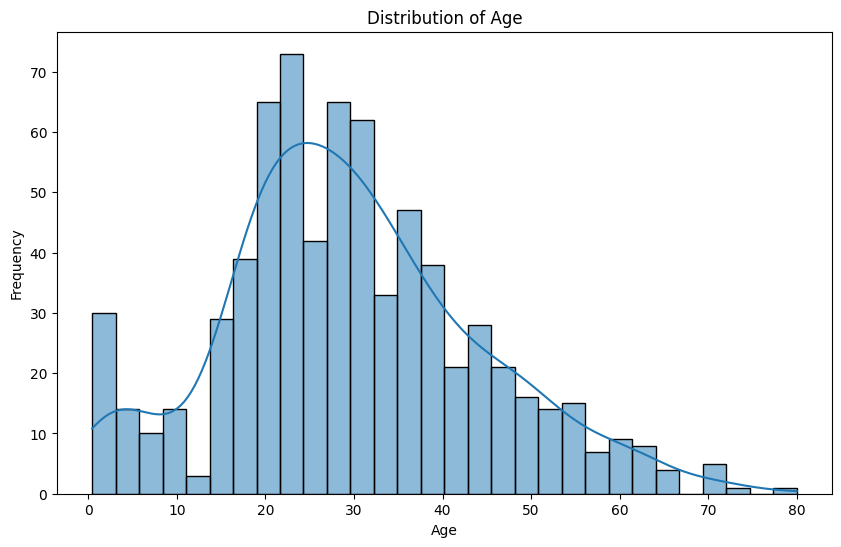

Unique values in 'Survived': ['0' '1' 'Zero' 'One']
Missing values in each column after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           7
Cabin          0
Embarked       0
dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_26428\2489201518.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_26428\2489201518.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
file_path = 'titanic.csv'
df = pd.read_csv(file_path)

# Step 1: Find out how many missing values there are in the dataset
missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

df['Cabin'] = df['Cabin'].fillna('Unknown')
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

unique_survived = df['Survived'].unique()
print("Unique values in 'Survived':", unique_survived)

df['Survived'] = df['Survived'].where(df['Survived'].isin([0, 1]), 0).astype(int)

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

df['Fare'] = df['Fare'].clip(lower=0)

# Summary of changes
print("Missing values in each column after handling:")
print(df.isnull().sum())


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

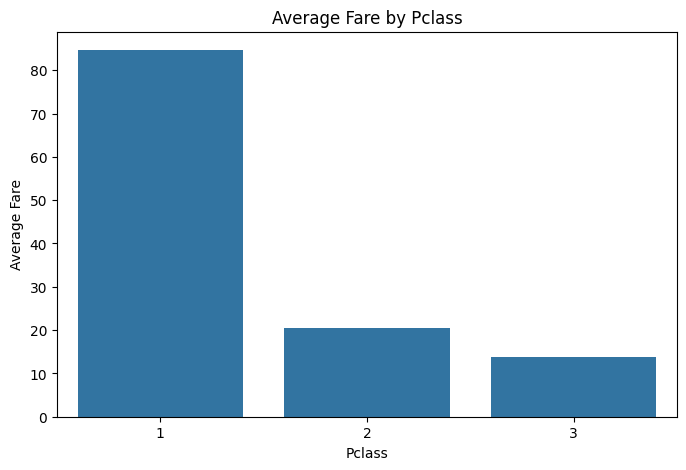

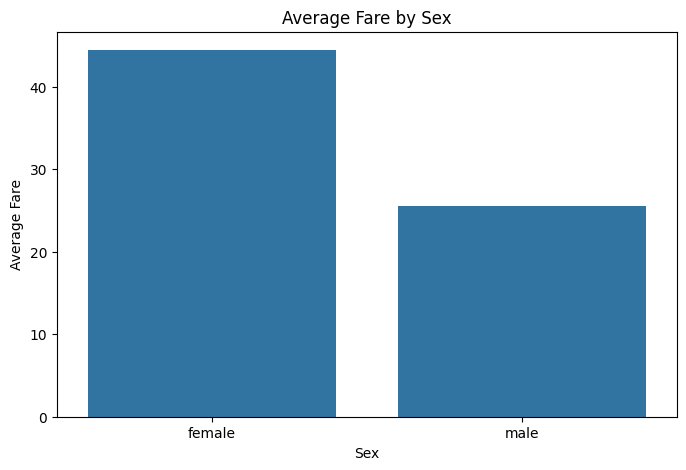

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'titanic.csv'
df = pd.read_csv(file_path)

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')  
df.dropna(subset=['Fare'], inplace=True) 

average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=average_fare_by_pclass.index, y=average_fare_by_pclass.values)
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

average_fare_by_sex = df.groupby('Sex')['Fare'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=average_fare_by_sex.index, y=average_fare_by_sex.values)
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

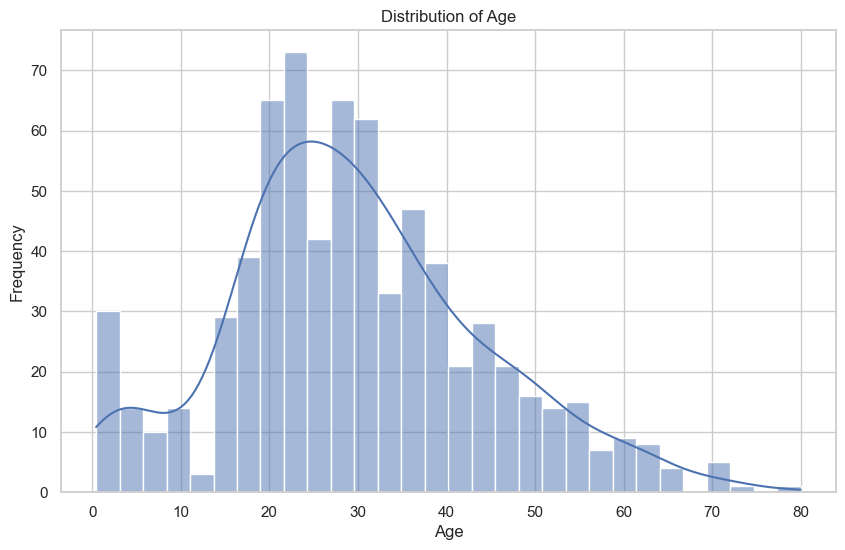

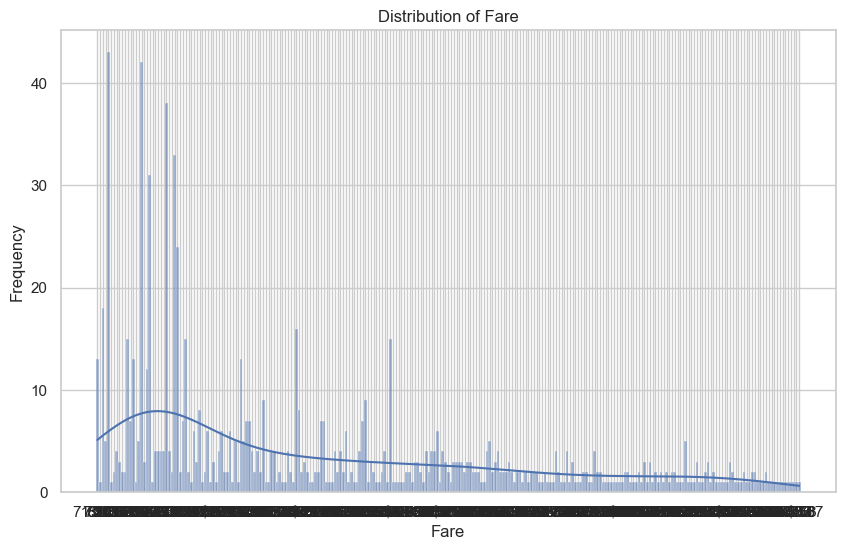

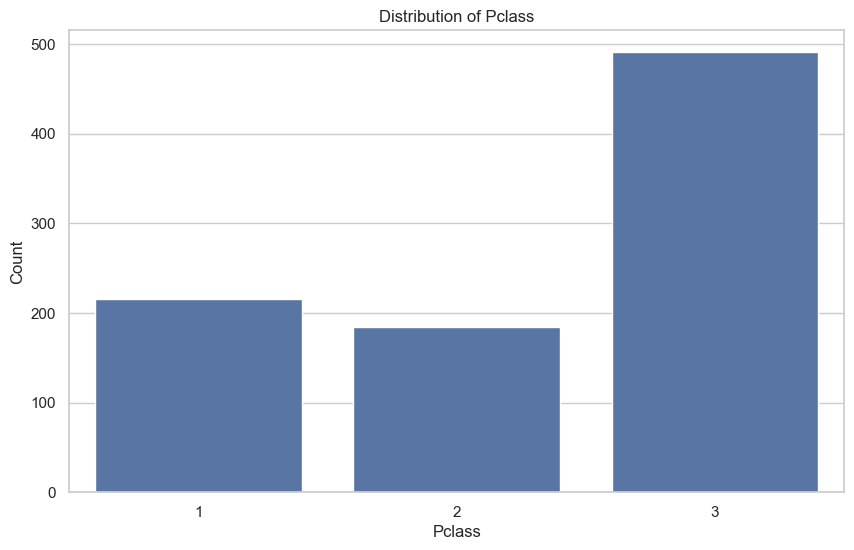

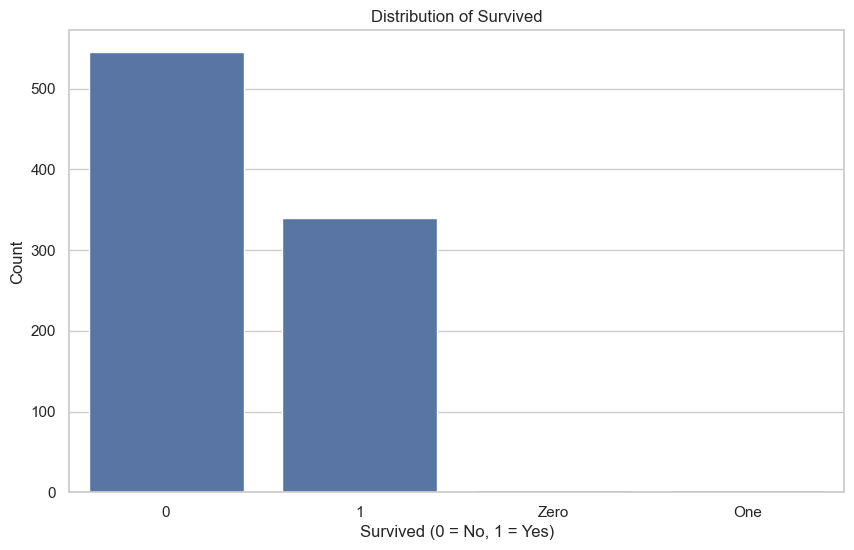

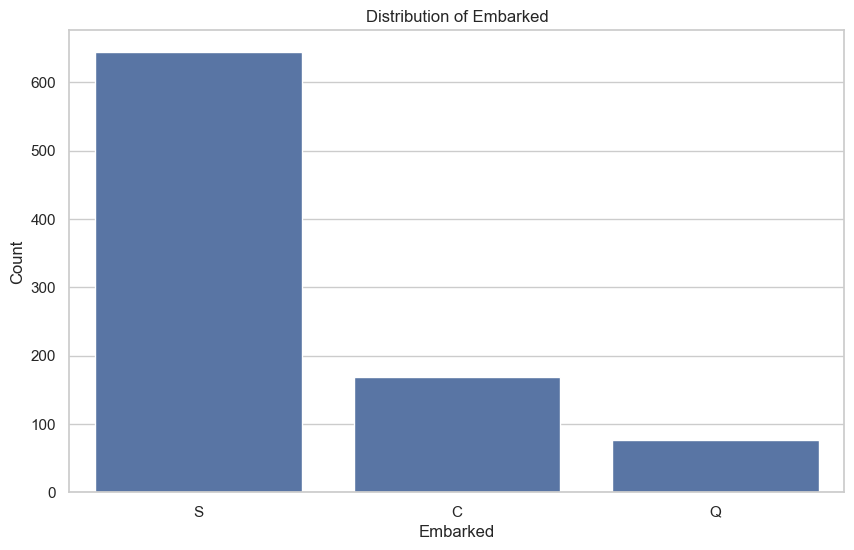

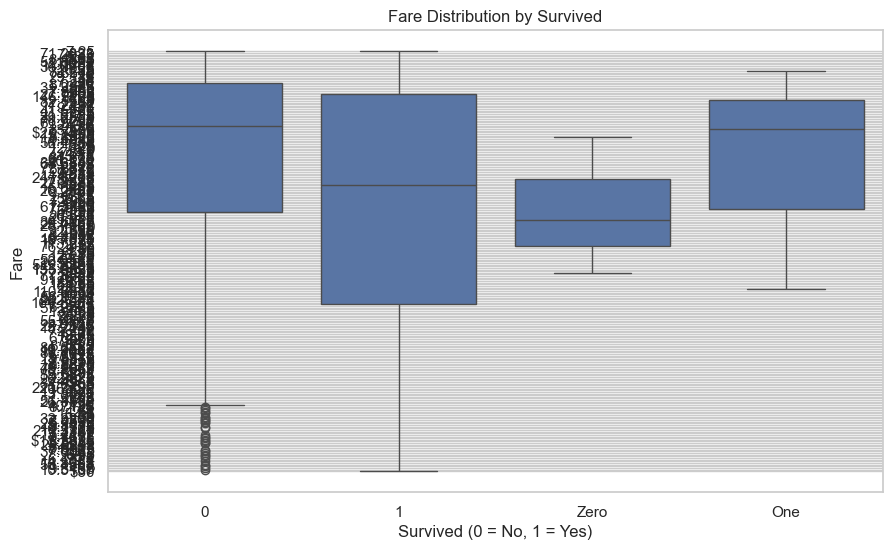

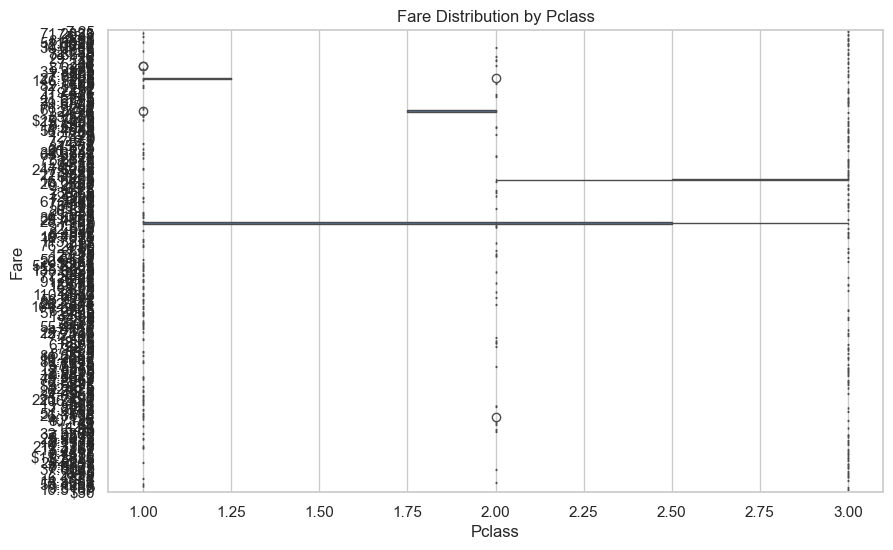

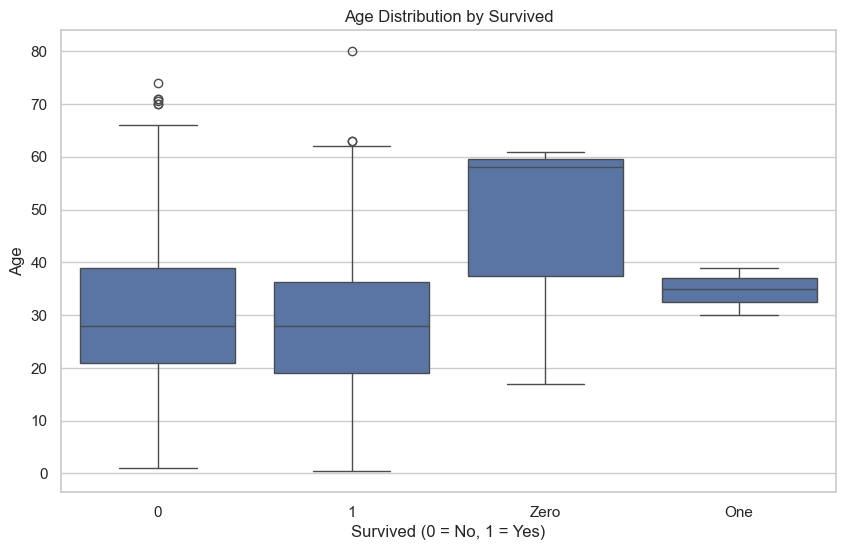

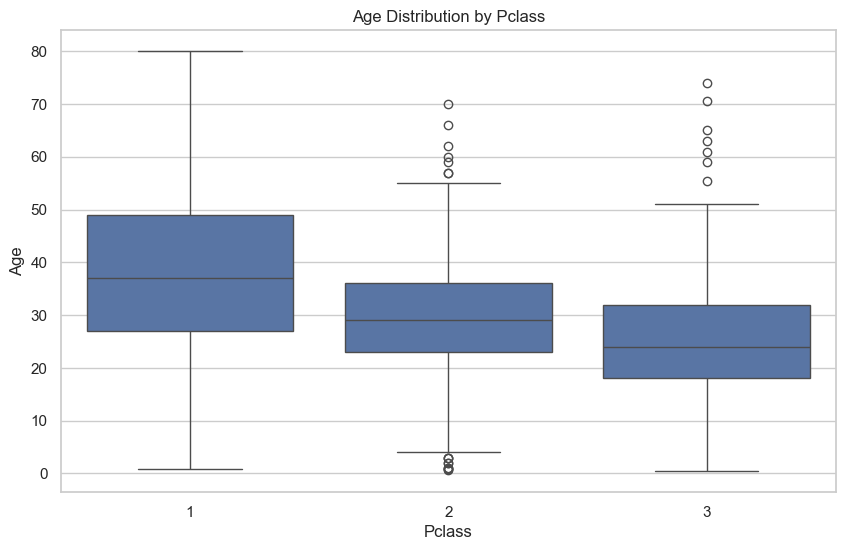

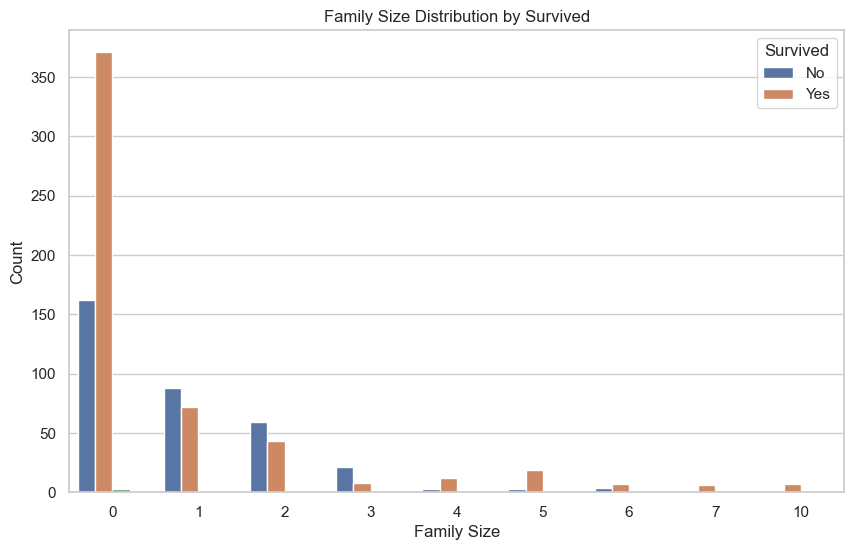

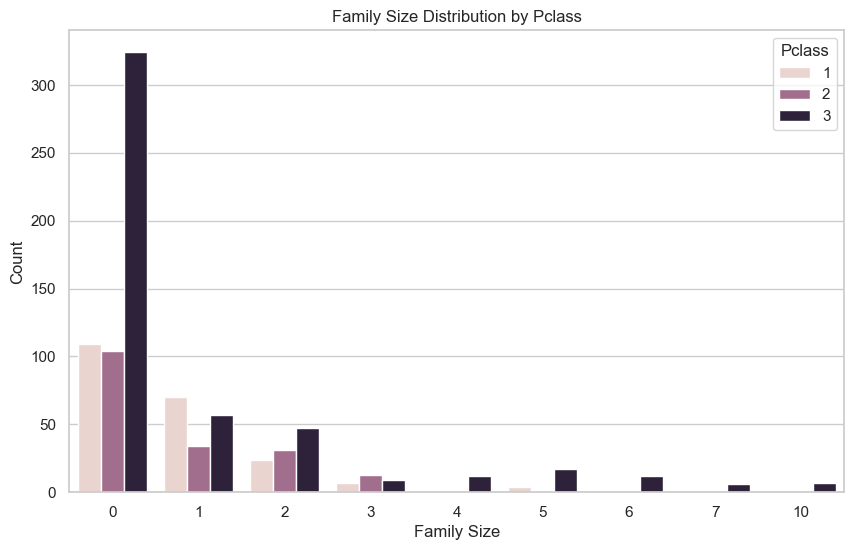

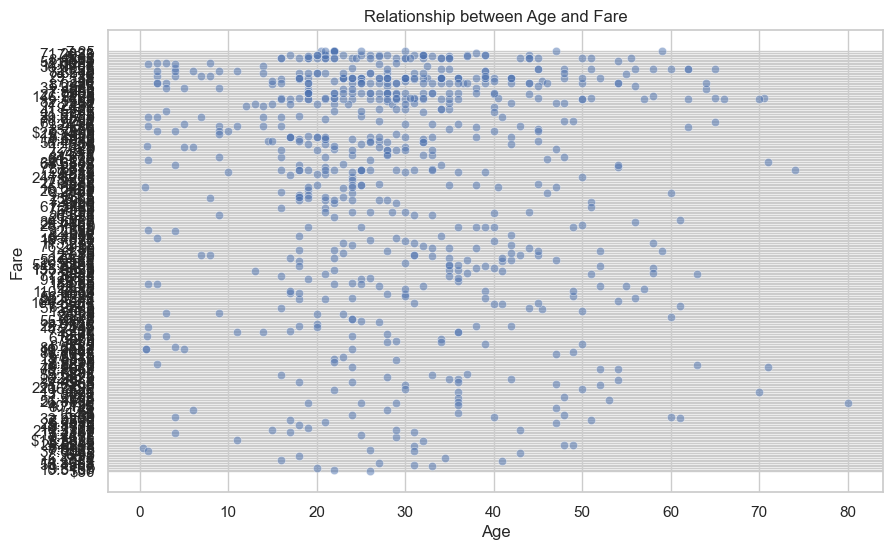

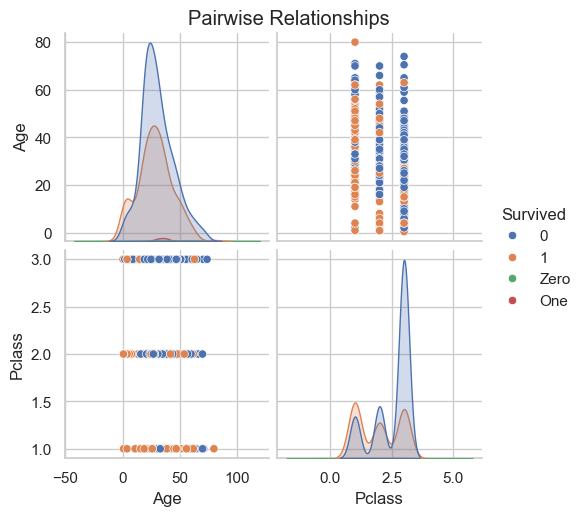

ValueError: could not convert string to float: 'Zero'

<Figure size 1000x800 with 0 Axes>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
file_path = 'titanic.csv'
df = pd.read_csv(file_path)

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Plot the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Plot the distribution of 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'].dropna(), bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# 3. Plot the distribution of 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# 4. Plot the distribution of 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 5. Plot the distribution of 'Embarked'
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=df)
plt.title('Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# 6. Plot the distribution of 'Fare' grouped by 'Survived'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

# 7. Plot the distribution of 'Fare' grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# 8. Plot the distribution of 'Age' grouped by 'Survived'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# 9. Plot the distribution of 'Age' grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# 10. Combine 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Family Size Distribution by Survived')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# 11. Combine 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Pclass', data=df)
plt.title('Family Size Distribution by Pclass')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Pclass', loc='upper right')
plt.show()

# 12. Plot a distribution between 'Age' and 'Fare'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, alpha=0.5)
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# 13. Are there any other possibilities to show relationships?
# You can explore relationships further using pair plots or correlation matrix heatmaps.
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
file_path = 'titanic.csv'
df = pd.read_csv(file_path)
print(df['Age'].unique())
print(df['Fare'].unique())

# Step 1: Check data types
print("Data Types:")
print(df.dtypes)

# Step 2: Convert relevant columns to numeric
for col in ['Age', 'Fare']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 3: Check for NaN values and print problematic rows if any
print("\nRows with NaN values:")
print(df[df.isna().any(axis=1)])

# Optionally drop rows with NaN values in numeric columns
df.dropna(subset=['Age', 'Fare'], inplace=True)

# Step 4: Verify data types again
print("\nData Types After Conversion:")
print(df.dtypes)

# Step 5: Generate a correlation matrix for the entire dataset
correlation_matrix = df.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

# Correlation with 'Survived'
survived_correlations = correlation_matrix['Survived'].drop('Survived')
print("\nCorrelation with 'Survived':")
print(survived_correlations)

# Additional correlations
pclass_survived_corr = df['Pclass'].corr(df['Survived'])
sibsp_parch_corr = df['SibSp'].corr(df['Parch'])

print(f"\nCorrelation between Pclass and Survived: {pclass_survived_corr:.2f}")
print(f"Correlation between SibSp and Parch: {sibsp_parch_corr:.2f}")
print(df['Age'].unique())
print(df['Fare'].unique())


[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
['7.25' '71.2833' '7.925' '53.1' '8.05' '8.4583' '51.8625' '21.075'
 '11.1333' '30.0708' '16.7' '26.55' '31.275' '7.8542' '16' '29.125' '13'
 '18' '7.225' '26' '8.0292' '35.5' '31.3875' '263' '7.8792' '7.8958'
 '27.7208' '146.5208' '7.75' '10.5' '82.1708' '52' '7.2292' '11.2417'
 '9.475' '21' '41.5792' '15.5' '21.6792' '17.8' '39.6875' '7.8' '76.7292'
 '61.9792' '27.75' '46.9' '80' '83.475' '27.9' '$27.7208' '15.2458'
 '8.1583' '8.6625' '73.5' '14.4542' '56.4958' '7.

ValueError: could not convert string to float: 'Zero'